In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data\\[1h]BTCUSDT.csv')

dataset.head()

,Start,Stop,Open,Close,Low,High,Volume
0,1502942400000,1502945999999,4261.48,4308.83,4261.32,4313.62,47.181009
1,1502946000000,1502949599999,4308.83,4315.32,4291.37,4328.69,23.234916
2,1502949600000,1502953199999,4330.29,4324.35,4309.37,4345.45,7.229691
3,1502953200000,1502956799999,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,1502960399999,4333.32,4360.69,4333.32,4377.85,0.972807


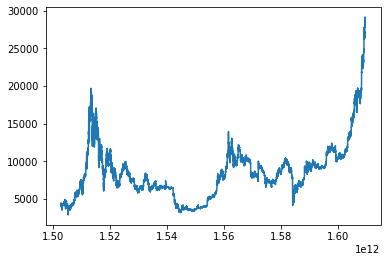

In [3]:
plt.plot(dataset.Start, dataset.Open)

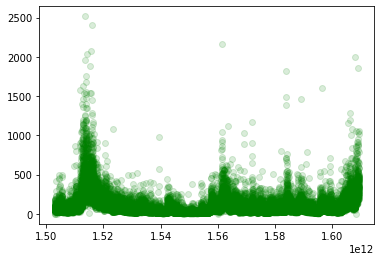

In [4]:
plt.plot((dataset.Start + dataset.Stop)/2, abs(dataset.High - dataset.Low), 'g', linestyle="",marker="o", alpha=0.15)

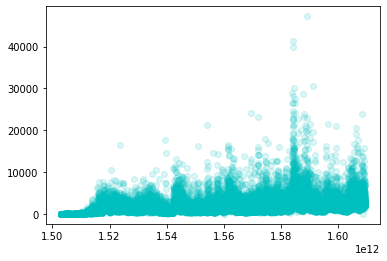

In [5]:
plt.plot((dataset.Start + dataset.Stop)/2, dataset.Volume, 'c', linestyle="",marker="o", alpha=0.15)

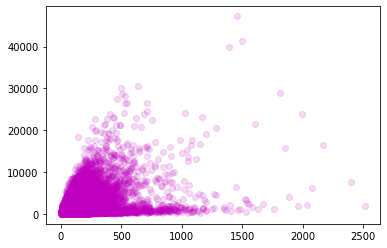

In [6]:
plt.plot(abs(dataset.High - dataset.Low), dataset.Volume, 'm', linestyle="",marker="o", alpha=0.15)